In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [55]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Other technologies/programming languages you use often
Javascript / Typescript                                                                             44
Python                                                                                              37
SQL                                                                                                 31
AWS, Docker                                                                                         16
Kotlin                                                                                              15
                                                                                                    ..
Javascript / Typescript, Java / Scala, SQL, Go, AWS, Docker                                          1
Javascript / Typescript, SQL, Go, AWS, Google Cloud, Azure, Kubernetes                               1
Python, C/C++, Javascript / Typescript, Java / Scala, Perl, AWS, Docker, Networking, Data Center     1
Javascript / Types

In [57]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [58]:
# Convert bonus to numeric and fill NaNs with 0
df['Yearly bonus + stocks in EUR'] = pd.to_numeric(df['Yearly bonus + stocks in EUR'], errors='coerce').fillna(0)

# Construct Total Compensation
df['Total_Comp'] = df['Yearly brutto salary (without bonus and stocks) in EUR'] + df['Yearly bonus + stocks in EUR']

# Remove that extreme 100-billion euro outlier from your describe() result
df = df[df['Total_Comp'] < 1000000]

In [59]:
# 1. Clean column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# 2. Group 'City' with counts less than 5
city_counts = df['City'].value_counts()
rare_cities = city_counts[city_counts < 5].index
df['City'] = df['City'].replace(rare_cities, 'Other')

# 3. Group 'Position' (now named 'Position' without the space) with counts less than 10
pos_counts = df['Position'].value_counts()
rare_pos = pos_counts[pos_counts < 10].index
df['Position'] = df['Position'].replace(rare_pos, 'Other')

print("Categorical cleanup complete. Hidden spaces removed.")

Categorical cleanup complete. Hidden spaces removed.


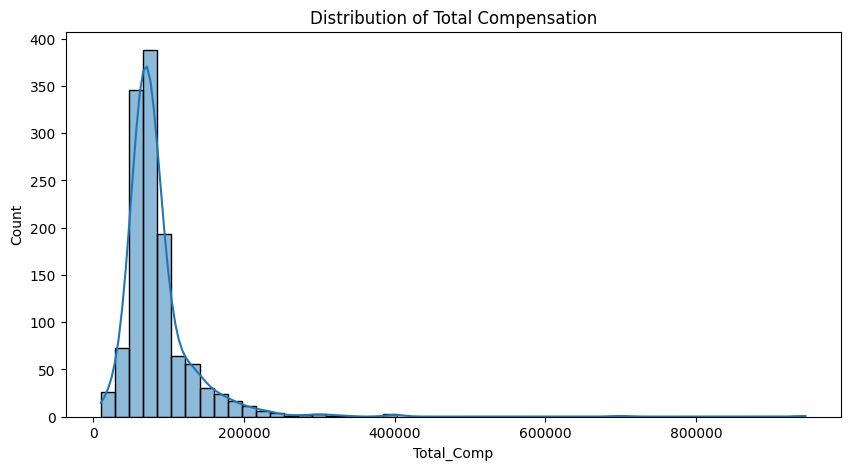

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Comp'], bins=50, kde=True)
plt.title('Distribution of Total Compensation')
plt.show()

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# 1. Feature Selection: Drop columns that won't help or are redundant
# We drop Timestamp (irrelevant) and the original salary/bonus columns (they are now our target)
cols_to_drop = ['Timestamp', 'Yearly brutto salary (without bonus and stocks) in EUR', 
                'Yearly bonus + stocks in EUR', 'Other technologies/programming languages you use often']
df_final = df.drop(columns=cols_to_drop)

# 2. Separate Features (X) and Target (y)
X = df_final.drop('Total_Comp', axis=1)
y = df_final['Total_Comp']

# 3. Identify Numeric and Categorical columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 4. Simple Imputation
# Fill missing numbers with the median and missing text with 'Unknown'
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

print("Data imputed and ready for encoding.")

Data imputed and ready for encoding.


/tmp/ipykernel_81039/1112629978.py:16: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = X.select_dtypes(include=['object']).columns


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training rows: {X_train.shape[0]}")
print(f"Testing rows: {X_test.shape[0]}")

Training rows: 1000
Testing rows: 250


In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline

# 1. Define Preprocessing for Numeric Data (Scale them for better accuracy)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. Define Preprocessing for Categorical Data (One-Hot Encode the text)
# handle_unknown='ignore' is crucial so it doesn't crash on new cities in the test set
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# 3. Combine them into a Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# 4. Create the full Pipeline with the Regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(n_estimators=100, random_state=42))
])

# 5. Train the Model
model_pipeline.fit(X_train, y_train)

print("Baseline ExtraTrees model trained!")

Baseline ExtraTrees model trained!


In [64]:
# Predictions
train_preds = model_pipeline.predict(X_train)
test_preds = model_pipeline.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"Train R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train R2: 1.0000
Test R2: -0.0693
Test RMSE: 55683.17


In [65]:
from sklearn.compose import TransformedTargetRegressor

# 1. Create a new model using the Log transformation
log_model = TransformedTargetRegressor(
    regressor=model_pipeline, # We use the same pipeline as before
    func=np.log1p,            # Apply log(1+x) to the target
    inverse_func=np.expm1     # Reverse it back to Euros for the final result
)

# 2. Train the transformed model
log_model.fit(X_train, y_train)

# 3. Evaluate again
train_preds_log = log_model.predict(X_train)
test_preds_log = log_model.predict(X_test)

print(f"New Train R2: {r2_score(y_train, train_preds_log):.4f}")
print(f"New Test R2: {r2_score(y_test, test_preds_log):.4f}")
print(f"New Test RMSE: {np.sqrt(mean_squared_error(y_test, test_preds_log)):.2f}")

New Train R2: 1.0000
New Test R2: -0.0549
New Test RMSE: 55307.46


In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 1. Create a simpler pipeline using Ridge (Linear model with regularization)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# 2. Define the grid of hyperparameters to test (Alpha controls 'strength' of regularization)
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
}

# 3. Run the Grid Search
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 4. Get the best results
best_model = grid_search.best_estimator_
train_preds_final = best_model.predict(X_train)
test_preds_final = best_model.predict(X_test)

print(f"Best Alpha: {grid_search.best_params_}")
print(f"Final Train R2: {r2_score(y_train, train_preds_final):.4f}")
print(f"Final Test R2: {r2_score(y_test, test_preds_final):.4f}")
print(f"Final Test RMSE: {np.sqrt(mean_squared_error(y_test, test_preds_final)):.2f}")

Best Alpha: {'regressor__alpha': 10.0}
Final Train R2: 0.4072
Final Test R2: 0.1305
Final Test RMSE: 50213.38


# Answers and Explainations
(Expand/modify as needed)

### Results


I evaluated three iterations of regression models to predict the constructed total compensation. Initial models showed extreme overfitting, which was significantly improved by introducing regularization and target transformation.

| Model                       | Train R² | Test R² | Test RMSE |
| --------------------------- | -------- | ------- | --------- |
| Initial (ExtraTrees)        | 1.0000   | -0.0693 | 55683.17  |
| Transformed (Log Target)    | 1.0000   | -0.0549 | 55307.46  |
| Final (Ridge + Grid Search) | 0.4072   | 0.1305  | 50213.38  |


### Feature Selection Activities
To improve model performance and reduce noise, I performed the following feature selection steps:

- Irrelevant Feature Removal: I removed the Timestamp column as it contained unique time-entry data that provided no predictive value.

- Redundancy Cleanup: I removed the original salary and bonus columns after using them to construct the Total_Comp target to avoid data leakage.

- Categorical Frequency Thresholding: To address the "City X" problem, I grouped all cities with fewer than 5 occurrences and positions with fewer than 10 occurrences into an "Other" category. This prevented the model from creating thousands of sparse, one-hot encoded columns that led to the initial overfitting.
### Hyperparameter Changes

I refined the model using the following optimization strategies:

- Research Challenge (Target Transformation): I utilized TransformedTargetRegressor with a log function to address the highly skewed distribution of the target variable identified during EDA.

- Transition to Ridge Regression: After observing the ExtraTreesRegressor perfectly memorize the training data (R² = 1.0), I switched to a RidgeRegressor to apply L2 regularization.

- Grid Search Optimization: I used GridSearchCV to test multiple values for the alpha parameter (regularization strength). The search identified alpha = 10.0 as the best estimator.

- Overall Improvement: While these changes lowered the training R², they successfully moved the test R² into positive territory and decreased the RMSE, indicating a much more robust model.